In [123]:
import numpy as np
import pandas as pd

import pymysql
import dotenv
import os
import pickle
import seaborn as sns
import matplotlib

from datetime import timedelta

import matplotlib.pyplot as plt

# Normalization/Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# 경고 무시 코드 추가
import warnings
warnings.filterwarnings('ignore')

def pltconfig_default() :
  sns.reset_defaults()
  %matplotlib inline

pltconfig_default()

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list


In [124]:
with open('final_data', 'rb') as file :
  data = pickle.load(file)
    
# filter_test = (data['년'] == 2022) & (data['월'] == 5) & (data['일'] == 3)
# data[filter_test]['금일발전량']


# 일사량, 적설량 데이터 누락에 따른 제외
data = data.drop(['일사량', '적설량'], axis=1)
# data = data.fillna(0.0)

data.iloc[:, 4:].describe()


,강수량,풍속,풍향,습도,일조시간,전운량,시정,지면온도,금일발전량
count,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000
mean,0.116777,1.089828,140.401302,61.817274,0.274124,4.928645,2336.877269,16.408785,7522.534993
std,1.031508,0.964430,132.421098,22.557304,0.411494,3.991391,1530.613062,13.342216,11300.716530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.500000,0.000000
25%,0.000000,0.400000,0.000000,45.000000,0.000000,0.000000,1300.000000,5.725000,0.000000
50%,0.000000,0.800000,140.000000,65.000000,0.000000,6.000000,2000.000000,17.000000,0.000000
75%,0.000000,1.600000,270.000000,82.000000,0.600000,9.000000,3399.000000,25.500000,13000.000000
max,37.900000,7.600000,360.000000,99.000000,1.000000,10.000000,44350.000000,58.900000,178000.000000


Text(0.5, 1.0, 'fairplot')

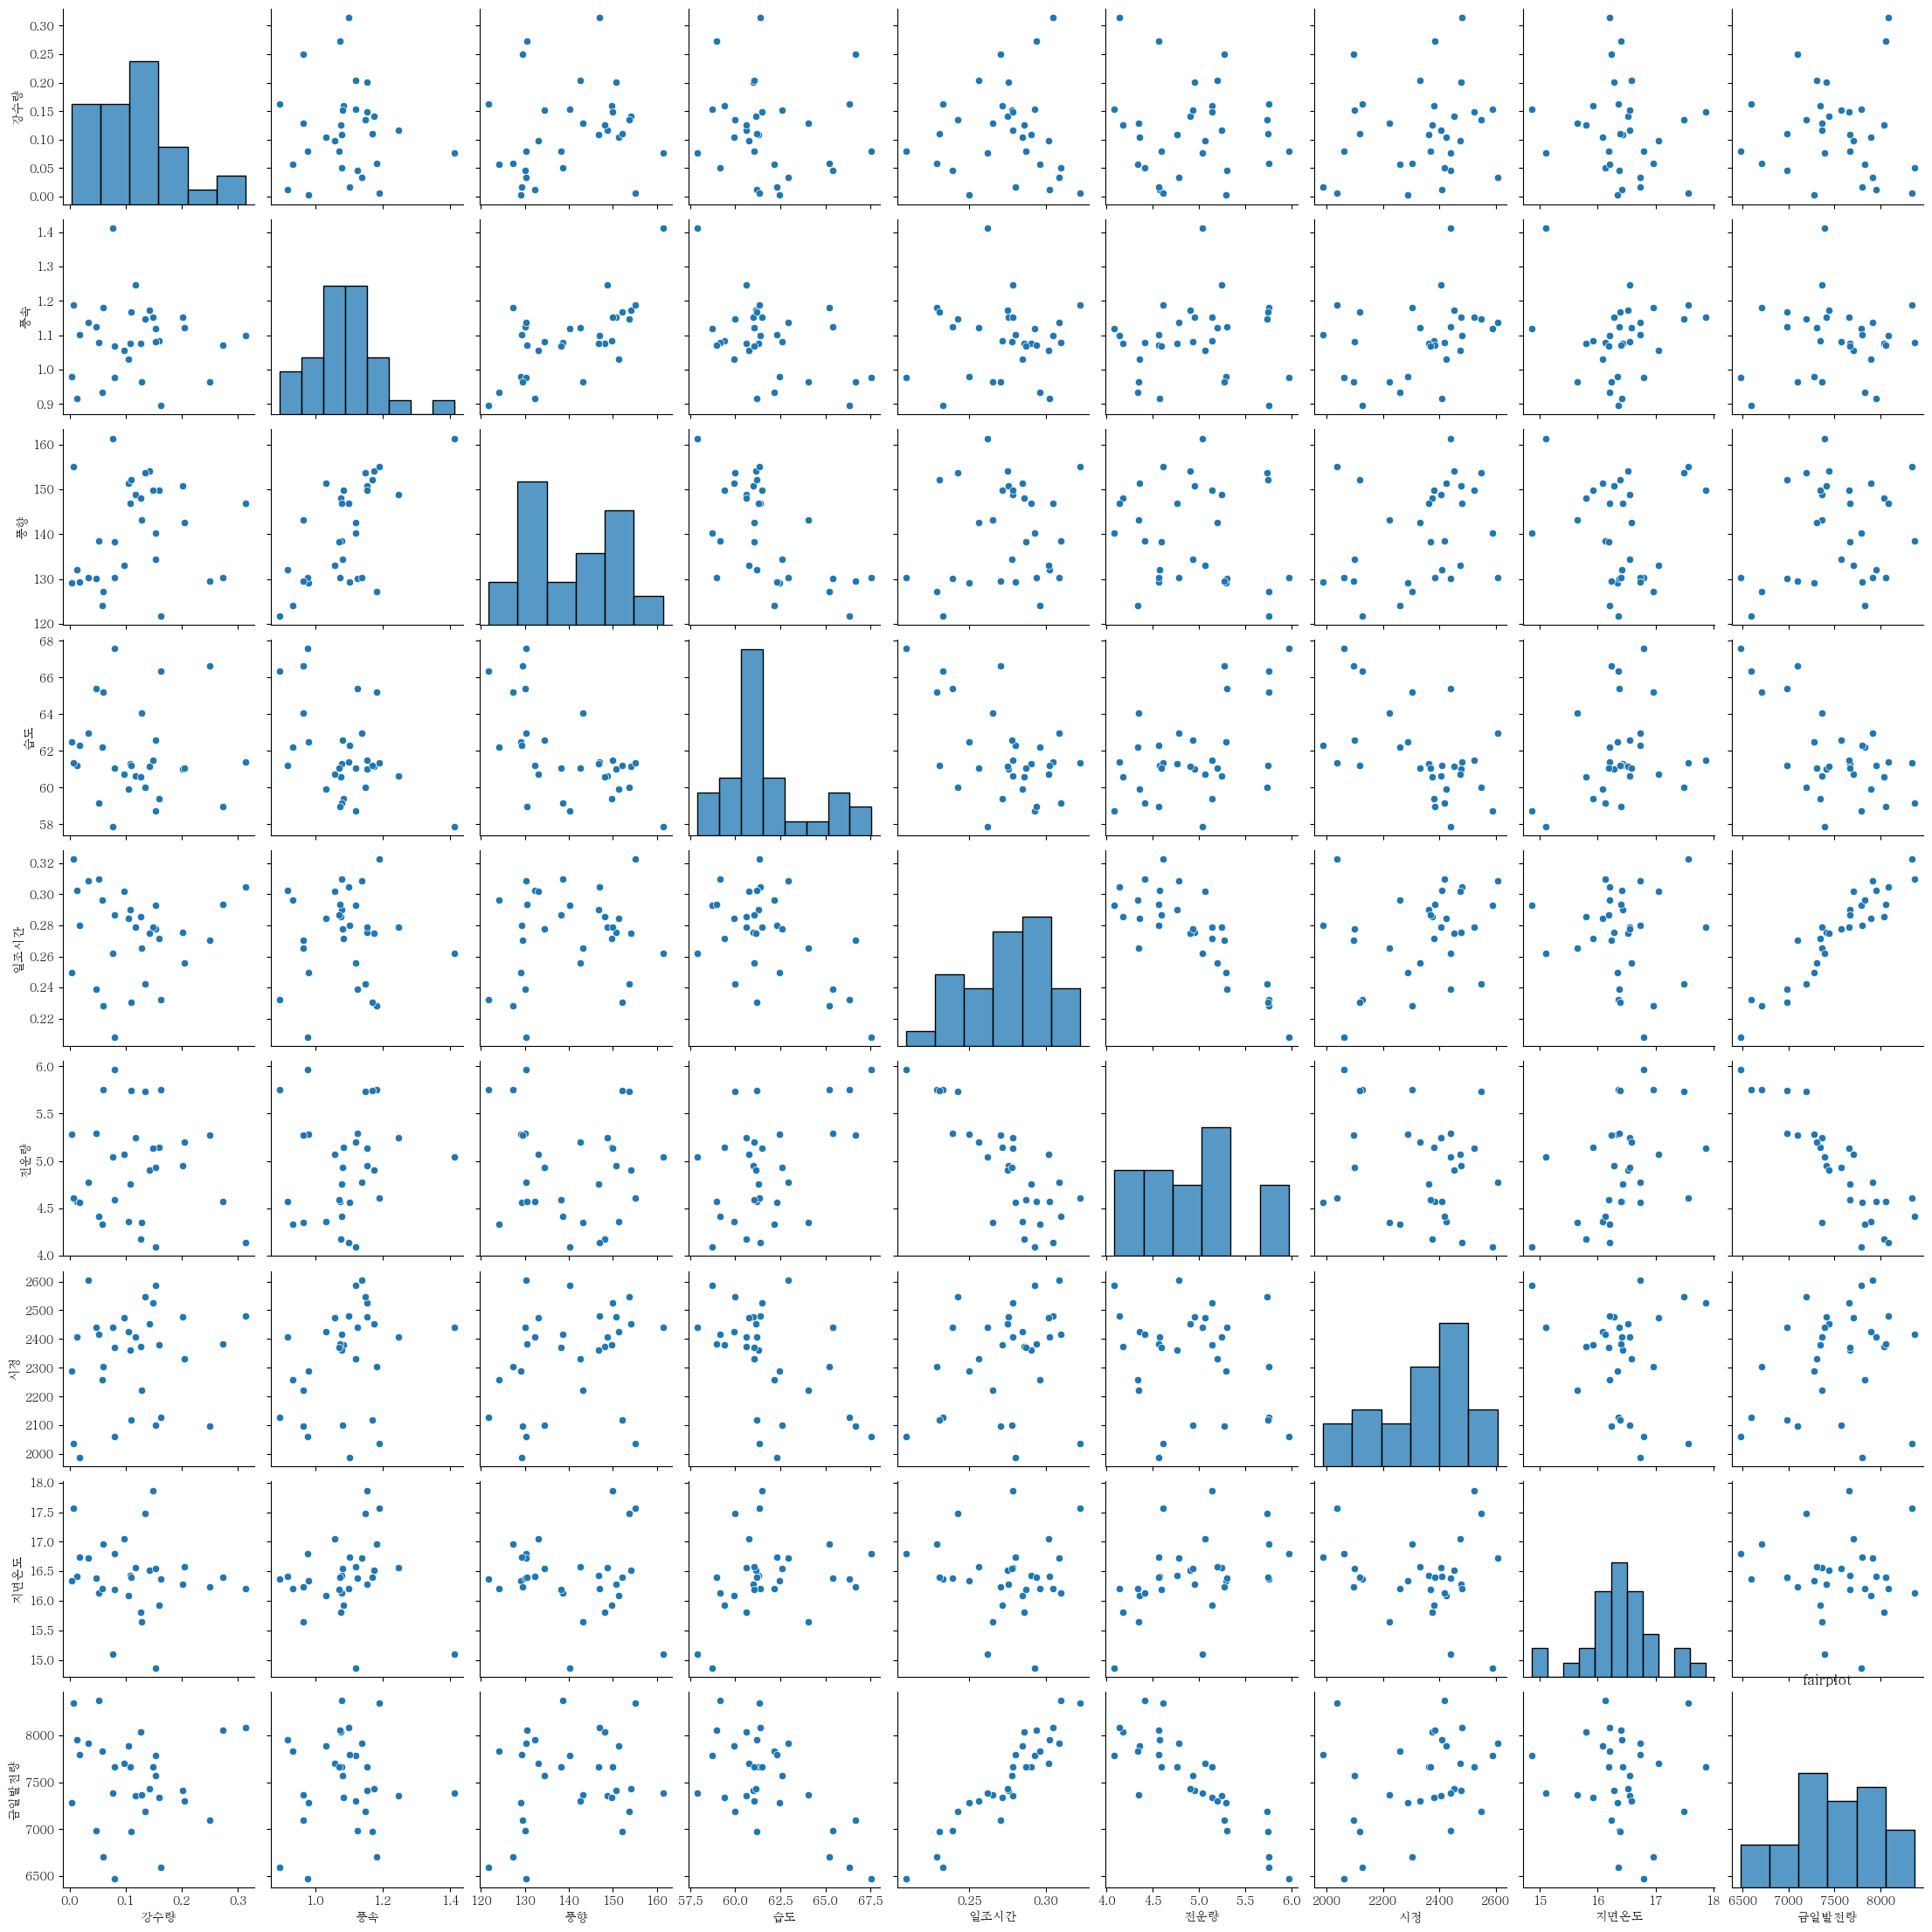

In [125]:
# 데이터 속성값 추가 관찰
df0 = data

g0 = df0.groupby('일')
gr0 = g0.mean()

gr0 = gr0.iloc[:,3:]

sns.pairplot(gr0)
plt.title('fairplot')


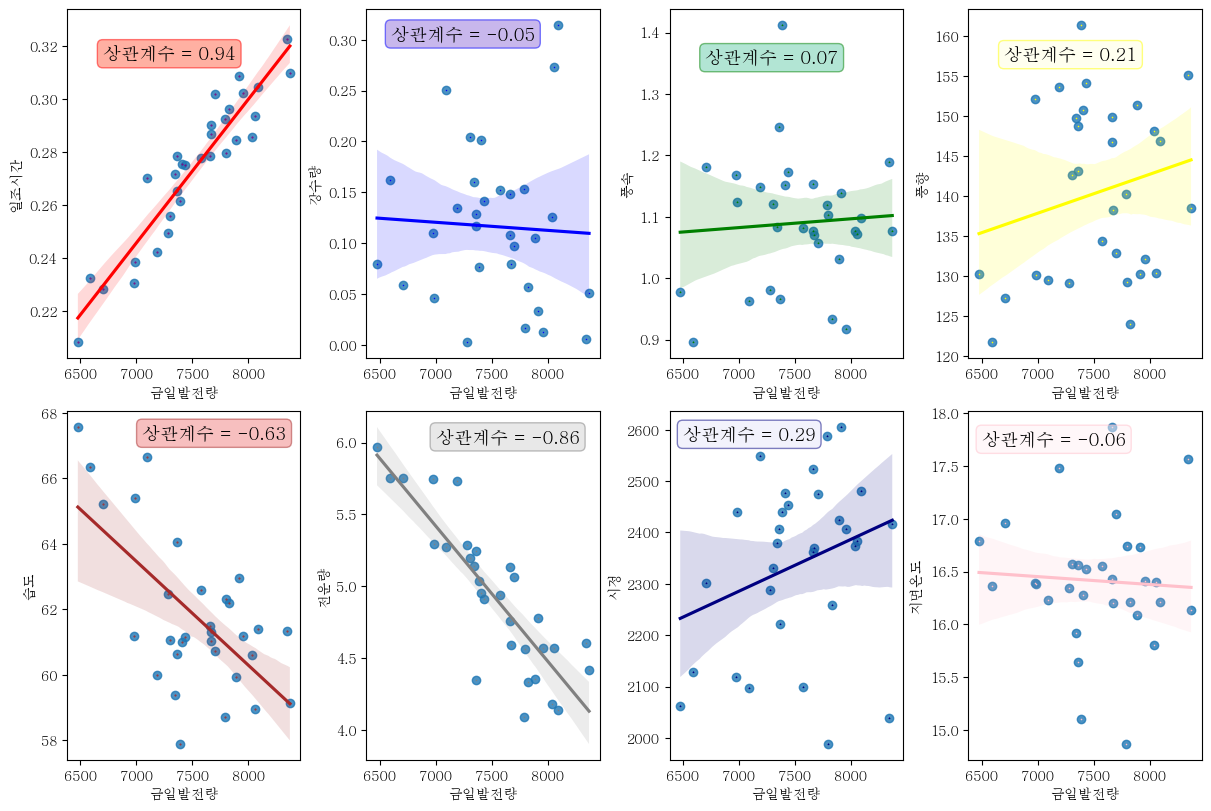

In [126]:
# 각 특성별 상관관계 분석
df1 = data

g1 = df1.groupby('일')
g1 = g1.mean()


g1 = g1.iloc[:,3:].reset_index(drop=True)

# print(g1.head())


# 상관계수 구하기
df_corr = g1.corr()

# print(df_corr)

fig, axes = plt.subplots(2,4, figsize=(12,8), layout='constrained')
def Box_Style(c_num) :
  color=['tomato', 'mediumpurple', 'mediumaquamarine', 'lightyellow', 'lightcoral', 'lightgrey', 'lavender', 'lavenderblush']
  edge_color=['red', 'blue', 'green', 'yellow', 'brown', 'grey', 'navy', 'pink']
  box_style={'facecolor': color[c_num], 'edgecolor':edge_color[c_num],'boxstyle':'round','alpha':0.5}
  return box_style
font_style={'weight': 'bold', 'size':13}

axes[0][0].plot('금일발전량', '일조시간', data=g1, linestyle='none', marker='o', markersize=0.5, color='purple')
sns.regplot(x=g1['금일발전량'], y=g1['일조시간'], fit_reg=True, line_kws={'color':'red'}, ax=axes[0][0])

axes[0][1].plot('금일발전량', '강수량', data=g1, linestyle='none', marker='*', markersize=0.5, color='blue')
sns.regplot(x=g1['금일발전량'], y=g1['강수량'], fit_reg=True, line_kws={'color':'blue'}, ax=axes[0][1])

axes[0][2].plot('금일발전량', '풍속', data=g1, linestyle='none', marker='v', markersize=0.5, color='green')
sns.regplot(x=g1['금일발전량'], y=g1['풍속'], fit_reg=True, line_kws={'color':'green'}, ax=axes[0][2])

axes[0][3].plot('금일발전량', '풍향', data=g1, linestyle='none', marker='x', markersize=0.5, color='yellow')
sns.regplot(x=g1['금일발전량'], y=g1['풍향'], fit_reg=True, line_kws={'color':'yellow'}, ax=axes[0][3])

axes[1][0].plot('금일발전량', '습도', data=g1, linestyle='none', marker='o', markersize=0.5, color='brown')
sns.regplot(x=g1['금일발전량'], y=g1['습도'], fit_reg=True, line_kws={'color':'brown'}, ax=axes[1][0])

axes[1][1].plot('금일발전량', '전운량', data=g1, linestyle='none', marker='*', markersize=0.5, color='grey')
sns.regplot(x=g1['금일발전량'], y=g1['전운량'], fit_reg=True, line_kws={'color':'grey'}, ax=axes[1][1])

axes[1][2].plot('금일발전량', '시정', data=g1, linestyle='none', marker='v', markersize=0.5, color='navy')
sns.regplot(x=g1['금일발전량'], y=g1['시정'], fit_reg=True, line_kws={'color':'navy'}, ax=axes[1][2])

axes[1][3].plot('금일발전량', '지면온도', data=g1, linestyle='none', marker='x', markersize=0.5, color='pink')
sns.regplot(x=g1['금일발전량'], y=g1['지면온도'], fit_reg=True, line_kws={'color':'pink'}, ax=axes[1][3])

# figure별 상관계수 적용
cnt = 0
cd = [(6700, 0.315), (6600,0.30), (6700, 1.35), (6700, 157), (7050, 67.2), (7000,6), (6500, 2580), (6500, 17.7)]
corr_num = [4,0,1,2,3,5,6,7]
for i in range(2) :
  for j in range(4) :
    axes[i][j].text(cd[cnt][0], cd[cnt][1], f"상관계수 = {df_corr.iloc[8,corr_num[cnt]]:.2f}", color='k', fontdict=font_style, bbox=Box_Style(cnt))
    cnt+=1

# 테스트
# axes[0][0].text(6700, 0.315, f"상관계수 = {df_corr.iloc[0,corr_num[0]]:.2f}", color='k', fontdict=font_style, bbox=Box_Style(0))

<Axes: >

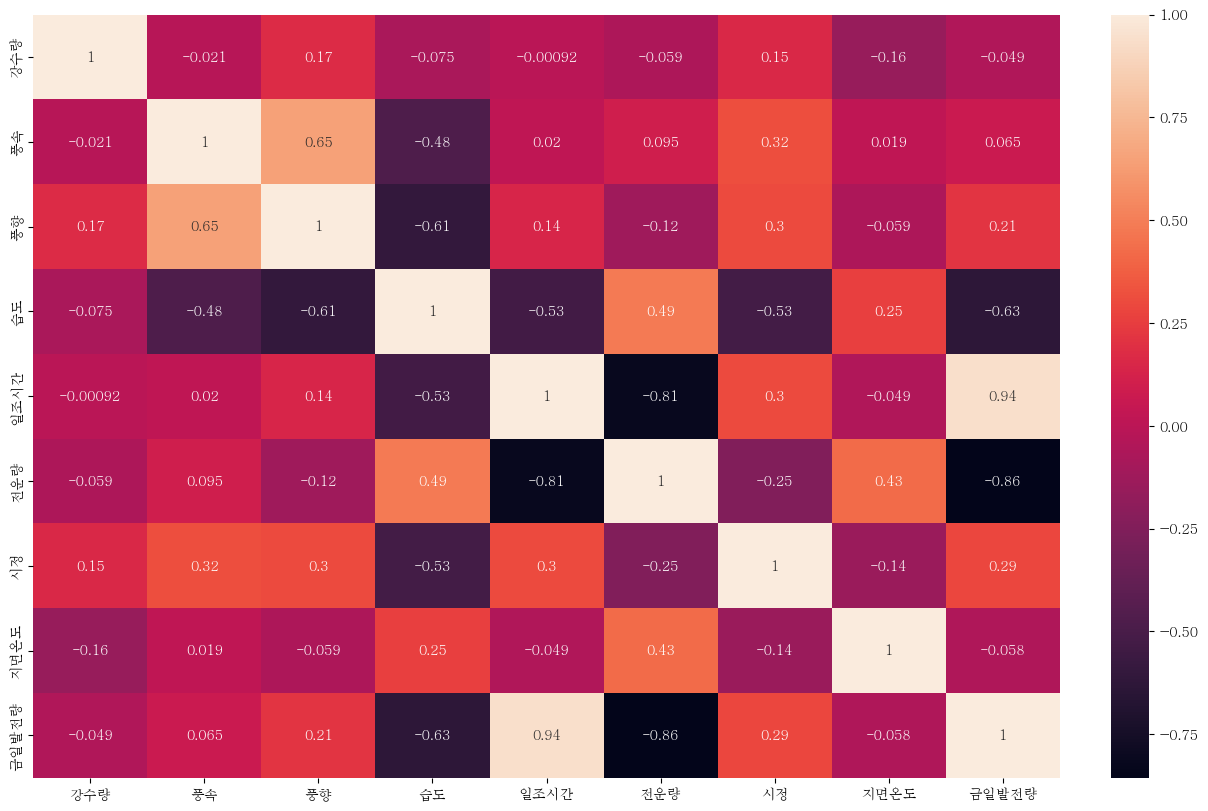

In [127]:
df2 = data

g2 = df2.groupby('일')
g2 = g2.mean()

g2 = g2.iloc[:,3:].reset_index(drop=True)

fig = plt.subplots(figsize=(12,8), layout='constrained') 
sns.heatmap(g2.corr(), linecolor='white', annot=True)

In [128]:
# Normalization/Standardization
# 각 특성들의 단위를 무시하고 값으로 단순 비교할 수 있도록 조정

df3 = data

# print(df3.head)

df3.set_index(['년','월','일','시간'], inplace=True)

scaler = StandardScaler()

scaler.fit(df3)

df_scaled = pd.DataFrame(scaler.transform(df3))
df_scaled = df_scaled.fillna(0.0)

df3

강수량   풍속     풍향    습도  일조시간  전운량      시정  지면온도  금일발전량
년    월  일  시간                                                       
2021 1  1  1   0.0  1.0   50.0  64.0   0.0  0.0  2000.0  -4.1    0.0
           2   0.0  0.2    0.0  71.0   0.0  0.0  2000.0  -4.6    0.0
           3   0.0  0.1    0.0  74.0   0.0  0.0  2000.0  -5.3    0.0
           4   0.0  0.0    0.0  78.0   0.0  0.0  2000.0  -5.7    0.0
           5   0.0  0.2    0.0  80.0   0.0  0.0  2000.0  -6.1    0.0
...            ...  ...    ...   ...   ...  ...     ...   ...    ...
2022 12 31 19  0.0  0.8  360.0  47.0   0.0  0.0  2879.0  -1.1    0.0
           20  0.0  0.1    0.0  53.0   0.0  0.0  2823.0  -1.6    0.0
           21  0.0  0.0    0.0  62.0   0.0  0.0  2567.0  -2.3    0.0
           22  0.0  0.6  320.0  70.0   0.0  0.0  2047.0  -2.8    0.0
           23  0.0  0.1    0.0  75.0   0.0  0.0  1592.0  -3.3    0.0

[17518 rows x 9 columns]

In [129]:
print(df_scaled)

              0         1         2         3         4         5         6  \
0     -0.113213 -0.093143 -0.682700  0.096766 -0.666187 -1.234854 -0.220099   
1     -0.113213 -0.922672 -1.060294  0.407096 -0.666187 -1.234854 -0.220099   
2     -0.113213 -1.026363 -1.060294  0.540094 -0.666187 -1.234854 -0.220099   
3     -0.113213 -1.130055 -1.060294  0.717426 -0.666187 -1.234854 -0.220099   
4     -0.113213 -0.922672 -1.060294  0.806091 -0.666187 -1.234854 -0.220099   
...         ...       ...       ...       ...       ...       ...       ...   
17513 -0.113213 -0.300526  1.658384 -0.656891 -0.666187 -1.234854  0.354197   
17514 -0.113213 -1.026363 -1.060294 -0.390894 -0.666187 -1.234854  0.317609   
17515 -0.113213 -1.130055 -1.060294  0.008101 -0.666187 -1.234854  0.150351   
17516 -0.113213 -0.507908  1.356308  0.362763 -0.666187 -1.234854 -0.189392   
17517 -0.113213 -1.026363 -1.060294  0.584427 -0.666187 -1.234854 -0.486667   

              7         8  
0     -1.537179 -0.6656